In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the dataset
df = pd.read_csv('electricity_bill_dataset.csv')
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [3]:
#check for missing values
missing_values = df.isna().any()
missing_values

Fan                False
Refrigerator       False
AirConditioner     False
Television         False
Monitor            False
MotorPump          False
Month              False
City               False
Company            False
MonthlyHours       False
TariffRate         False
ElectricityBill    False
dtype: bool

In [4]:
# Encode categorical variables
categorical_features = ['Month', 'City', 'Company']
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

In [5]:
# Combine encoded features with the rest of the data
df = df.drop(categorical_features, axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [6]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('ElectricityBill', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [7]:
# Split the data
X = scaled_df
y = df['ElectricityBill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
# Make predictions
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.3815736023826122


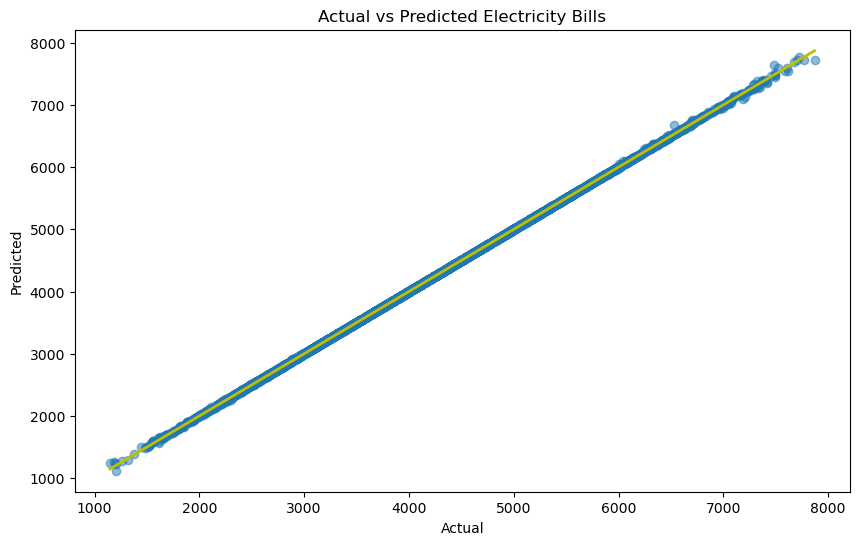

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'y-', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Electricity Bills')
plt.show()